In [7]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/kaggle/input/pokemon/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [12]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        374
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [14]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
11,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False


In [20]:
defe = df.groupby('Type 2').agg({'Defense':pd.Series.mean})
defe

,Defense
Type 2,
Bug,80.000000
Dark,65.411765
Dragon,85.066667
Electric,68.333333
Fairy,64.611111
Fighting,79.095238
Fire,71.200000
Flying,66.296703
Ghost,79.000000


In [83]:
defe.describe()

,Defense
count,18.000000
mean,78.282986
std,16.911836
min,53.750000
25%,66.805861
50%,79.047619
75%,84.131514
max,126.857143


In [84]:
defe.max()

Defense    126.857143
dtype: float64

In [85]:
defe.idxmax()

Defense    Rock
dtype: object

In [86]:
defe.min()

Defense    53.75
dtype: float64

In [89]:
defe.idxmin()

Defense    Normal
dtype: object

In [21]:
defe.index

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object', name='Type 2')

In [22]:
defe.values

array([[ 80.        ],
       [ 65.41176471],
       [ 85.06666667],
       [ 68.33333333],
       [ 64.61111111],
       [ 79.0952381 ],
       [ 71.2       ],
       [ 66.2967033 ],
       [ 79.        ],
       [ 75.10526316],
       [ 84.06451613],
       [ 84.15384615],
       [ 53.75      ],
       [ 57.48387097],
       [ 79.89285714],
       [126.85714286],
       [103.7       ],
       [ 85.07142857]])

<BarContainer object of 18 artists>

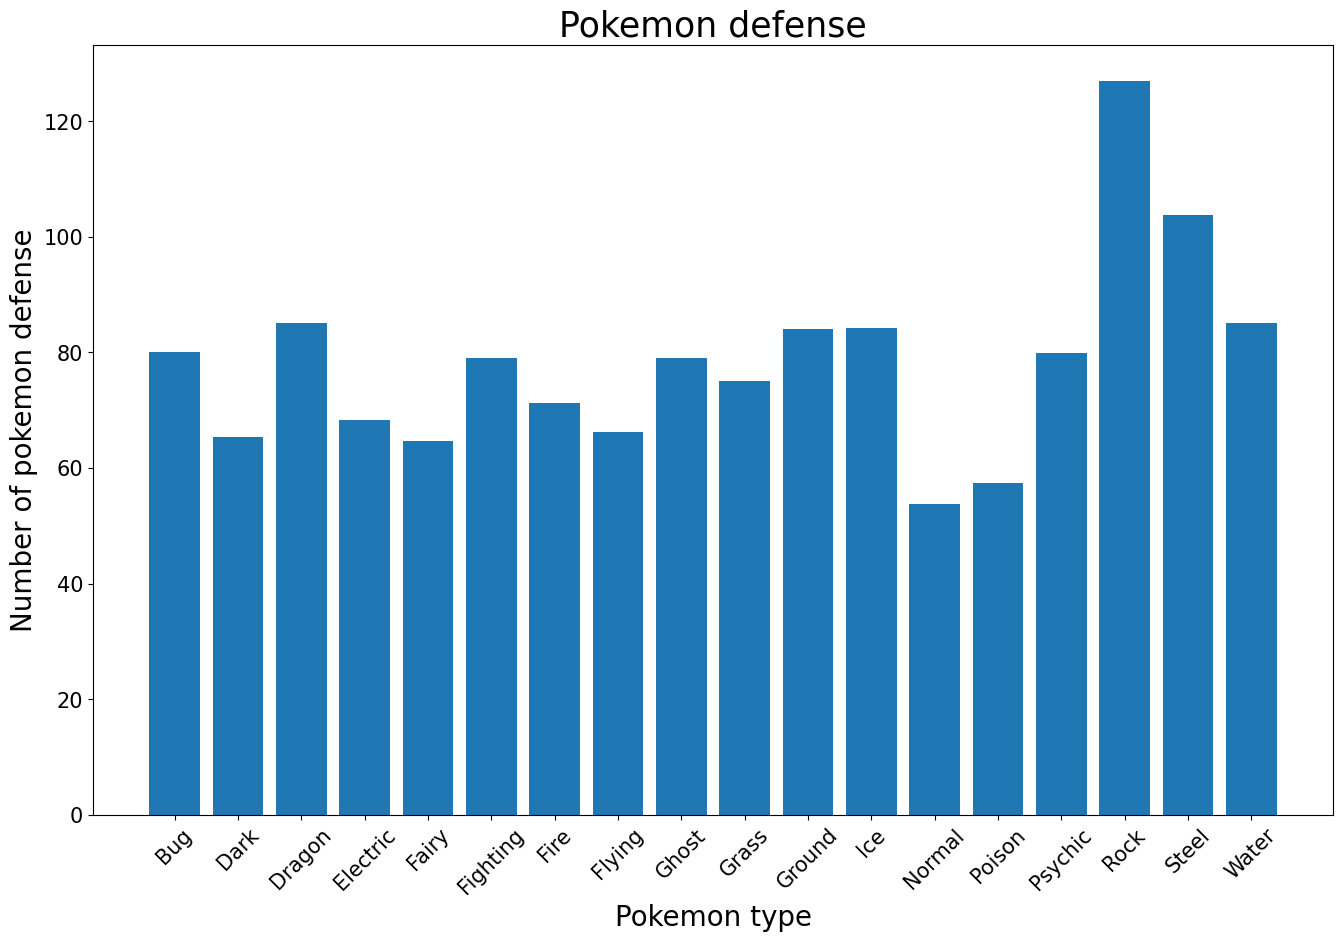

In [43]:
plt.figure(figsize=(16, 10))
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Pokemon defense", fontsize=25)
plt.ylabel("Number of pokemon defense", fontsize=20)
plt.xlabel("Pokemon type", fontsize=20)

plt.bar(defe.index, defe.values.reshape(len(defe)))

In [50]:
df['Legendary'].value_counts()

Legendary
False    334
True      34
Name: count, dtype: int64

In [51]:
df[df['Legendary'] == True]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
142,143,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
143,144,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
144,145,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
247,248,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
248,249,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
378,379,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
379,380,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
382,383,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
383,384,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
491,492,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True


In [75]:
lege = df.groupby('Type 2').agg({'Attack':pd.Series.sum})
lege

,Attack
Type 2,
Bug,270
Dark,1737
Dragon,1365
Electric,436
Fairy,897
Fighting,2098
Fire,705
Flying,6989
Ghost,1093


In [91]:
lege.max()

Attack    6989
dtype: int64

In [92]:
lege.idxmax()

Attack    Flying
dtype: object

In [93]:
lege.min()

Attack    211
dtype: int64

In [94]:
lege.idxmin()

Attack    Normal
dtype: object

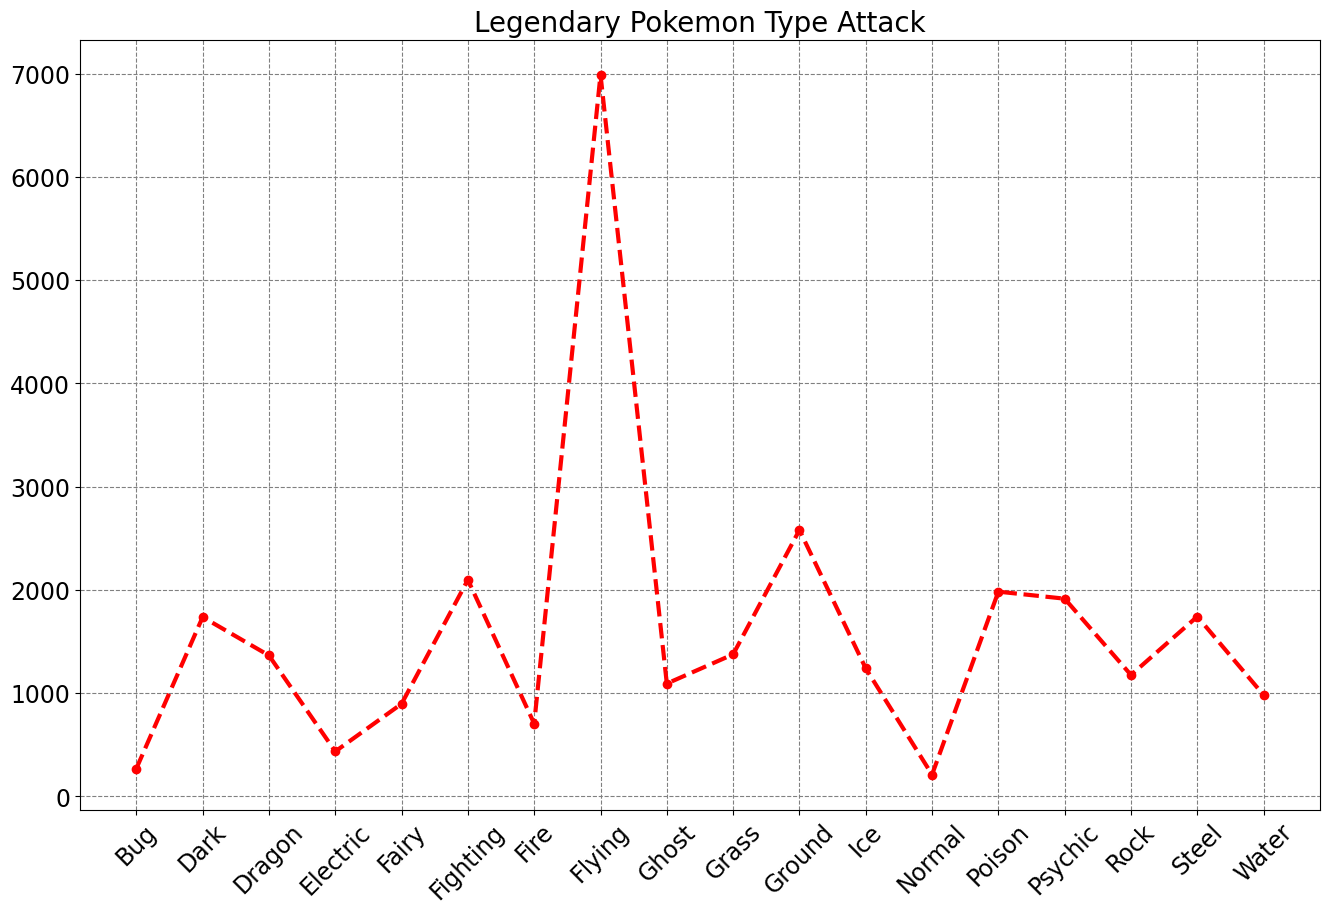

In [98]:
plt.figure(figsize=(16,10))
plt.title("Legendary Pokemon Type Attack", fontsize=20)
plt.xticks(fontsize=17, rotation=45)
plt.yticks(fontsize=17)
plt.grid(color='grey', linestyle='--')

plt.plot(lege.index, lege.values, linewidth=3, marker='o', linestyle='--', color='red')